In [ ]:
#importing the required libraries
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [ ]:
#importing the libraries required for dataset handling
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

#metrics will be required to measure how well the clusters are there in data
from sklearn.metrics import mean_squared_error, silhouette_score

In [ ]:
# List of colors
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

In [ ]:
#dataset creation and preprocessing
X, y = make_blobs(n_features = 50, centers = 20, n_samples = 20000, cluster_std = 0.2,
                 center_box = [-1,1], random_state = 17)
#X will contains the postion of data and y will contain the class label of the data that we are generating
#n_features will contain the number or dimensions of the data
#centers specify the class of the clusters so we have 20 clusters
#n_samples specify the number of samples we are generating
#cluster_std specify the std between the clusetrs
#center box will help for dimension reduction

In [ ]:
#checking the first data
X[0]
#50 values array or vector

array([-0.24491985,  0.08099673, -0.36631058, -0.30356551,  0.4029225 ,
        0.65687067,  0.92734294,  0.15492068, -1.10501981,  1.2015462 ,
        0.09578114, -0.75648951, -0.03483697, -0.59523737,  0.02576486,
        0.53523807,  0.08089194, -0.26480015, -0.71277422,  0.07793643,
        0.10326661, -0.92311803, -0.18569531, -0.5761846 , -0.78765359,
       -0.83055169,  0.04446853, -0.26118528,  0.8337965 , -0.59227263,
        0.68834042,  0.17701281,  0.2732509 , -0.00538731,  0.92922794,
        0.62743183,  0.85424358,  0.80721711, -1.14219787,  0.28178435,
        0.55215801,  0.38500603,  0.19163107,  0.55960783,  0.72073584,
       -1.14520866,  1.09184982, -1.04337987,  1.24350139, -0.63786661])

In [ ]:
#dividing the generated data into the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,
                                                    random_state =17)
#using min max scaler to maintain the test box size of points
scaler = MinMaxScaler()
#it will scale each features or dimension between 0 to 1
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#fitting and transforming the X data

In [ ]:
#we will use PCA for our basline model
pca = PCA(n_components = 2)
#creating a pca model to reduce the dimension of the data from 50 to 2
pca.fit(X_train)
#training the pca model
#for testing the model to check how many clusters it retain
res_pca = pca.transform(X_test)

In [ ]:
res_pca.shape
#to check the results shape of pca

(2000, 2)

Text(0.5, 1.0, 'PCA Results')

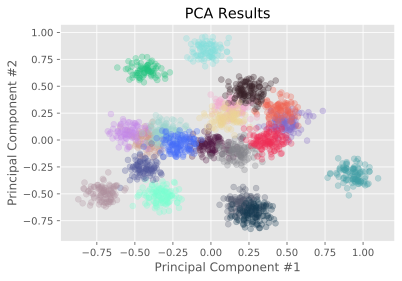

In [ ]:
unique_labels = np.unique(y_test)

#to check how many clusters are retained
for index,unique_label in enumerate(unique_labels):
    X_data = res_pca[y_test == unique_label]
    
    #plotting the pca results
    plt.scatter(X_data[:,0], X_data[:,1], alpha = 0.3, c = cols[index])
    
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.title('PCA Results')

In [ ]:
#building of autoencoder
autoencoder = MLPRegressor(alpha = 1e-15,
                           hidden_layer_sizes = (50, 100, 50, 2 ,50, 100, 50),
                          random_state = 1, max_iter = 20000)
#Since now it is not the classification task , due to the reduction of the error
#alpha is learning rate and using MLP regressor we can define the hidden layers 
#with first encoder, bottle neck and then decoder, so encoder and decoder layer size should be mirrored
#training the model, while input data will be X_train only, output should also be X_train only
autoencoder.fit(X_train, X_train)

MLPRegressor(activation='relu', alpha=1e-15, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=20000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
             solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
#performing the dimensionality reduction on the generated data
w = autoencoder.coefs_
#to extract the weights of the model
biases = autoencoder.intercepts_
#to extract the biases of the model

In [ ]:
#to check the shape of weights
for W in w:
    print(W.shape)

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [ ]:
#taking the encoder weights and biases
encoder_weights = w[0:4]
encoder_biases = biases[0:4]

In [ ]:
def encode(encoder_weights, encoder_biases, data):
    res_ae = data
    for index, (W, b) in enumerate(zip(encoder_weights, encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae = res_ae@W+b
            #not applying non lineraity to the final encopder layer
        else:
            res_ae = np.maximum(0,res_ae@W+b)
        #introducing the non-linearity via relu
    return res_ae
    
res_ae = encode(encoder_weights, encoder_biases, X_test)
        

In [ ]:
res_ae.shape
#to check the shape of the result

(2000, 2)

Text(0.5, 1.0, 'Autoencoder Results')

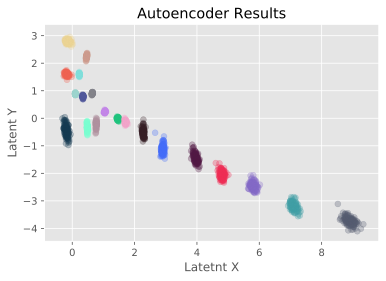

In [ ]:
#plotting the result of autoencoder
uniques_labels = np.unique(y_test)

#to check how many clusters are retained
for index,unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test == unique_label]
    
    plt.scatter(latent_space[:,0], latent_space[:,1], alpha = 0.3, c = cols[index])
    
plt.xlabel('Latetnt X')
plt.ylabel('Latent Y')
plt.title('Autoencoder Results')


In [ ]:
#autoencoder works better than the pca in 2d
silhouette_score(X_test, y_test)

0.6100948647899368

In [ ]:
silhouette_score(res_pca, y_test)

0.3678678782395247

In [ ]:
silhouette_score(res_ae, y_test)
#this score tells how well the clusters have been in the data

0.8074659601928073